# Análisis de Anomalias con Redes Neuronales J.Lerga 10/07/2024

In [23]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [24]:
# Paso 1: Crear un conjunto de datos sintético basado en las gráficas
time = np.linspace(0, 120, 1200)
vibration_data = np.sin(time) + np.random.normal(0, 0.1, len(time))  # Datos de vibración sintéticos
torque_data = np.cos(time) + np.random.normal(0, 0.1, len(time))     # Datos de torque sintéticos

# Introducir inestabilidades sintéticas
vibration_data[600:700] += 3  # Aumento de vibración indicando inestabilidad
torque_data[600:700] += 3     # Aumento de torque indicando inestabilidad

# Crear un DataFrame con los datos
data = pd.DataFrame({
    'time': time,
    'vibration': vibration_data,
    'torque': torque_data
})

In [25]:
# Paso 2: Preprocesamiento de datos
data['vibration_normalized'] = (data['vibration'] - data['vibration'].mean()) / data['vibration'].std()
data['torque_normalized'] = (data['torque'] - data['torque'].mean()) / data['torque'].std()

In [26]:
# Paso 3: Modelado con Isolation Forest para detección de anomalías
model = IsolationForest(contamination=0.05)
data['anomaly_score'] = model.fit_predict(data[['vibration_normalized', 'torque_normalized']])


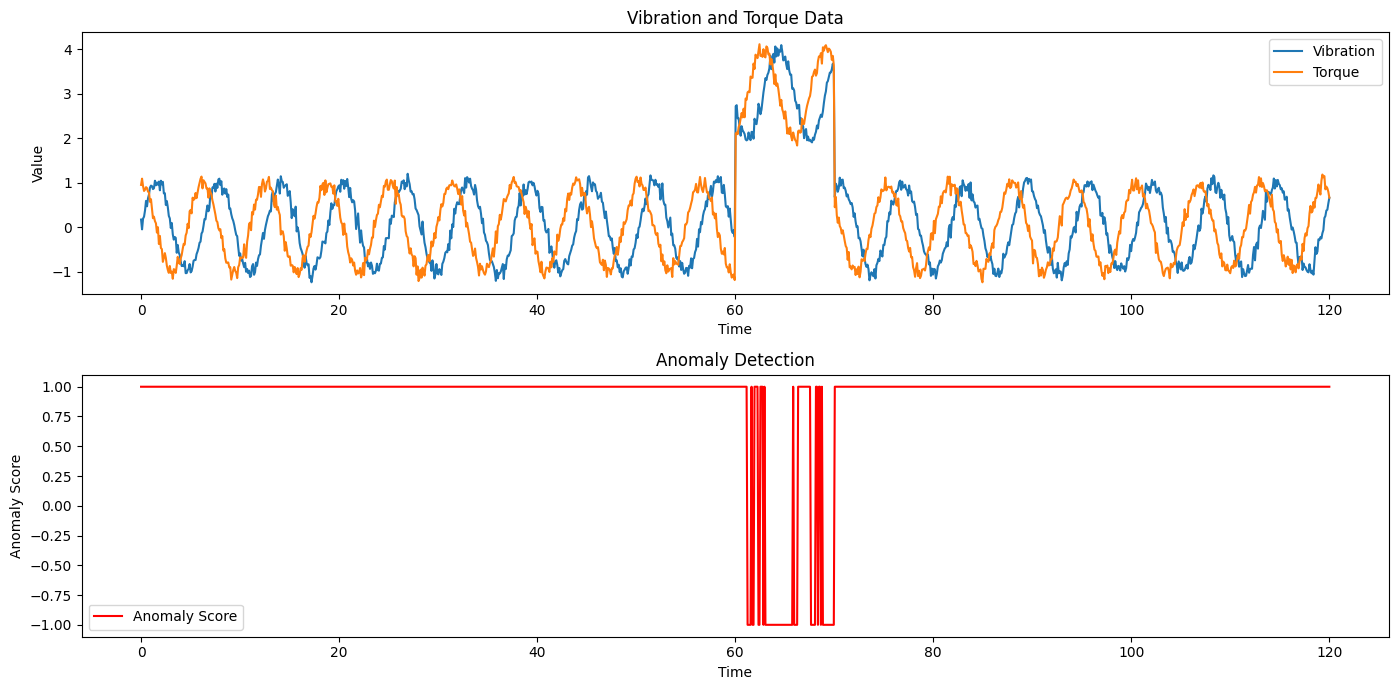

In [27]:
# Paso 4: Visualización de resultados
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['vibration'], label='Vibration')
plt.plot(data['time'], data['torque'], label='Torque')
plt.title('Vibration and Torque Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['time'], data['anomaly_score'], label='Anomaly Score', color='r')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
# Cargar el archivo CSV con los datos de vibraciones
data = pd.read_csv('20231127171227_total.csv', sep=';', index_col=1)

# Asegurarse de que el DataFrame tiene las columnas correctas
data.columns = ['valor']

# Seleccionar los primeros 1000000 valores
data = data.head(2000000)

data.head()


,valor
timestamp,
27-Nov-2023 17:12:27,286.40
27-Nov-2023 17:12:27,274.56
27-Nov-2023 17:12:27,259.84
27-Nov-2023 17:12:27,279.68
27-Nov-2023 17:12:27,273.28


In [29]:

# Paso 2: Preprocesamiento de datos
data['valor_normalized'] = (data['valor'] - data['valor'].mean()) / data['valor'].std()



In [30]:
# Paso 3: Modelado con Isolation Forest para detección de anomalías
model = IsolationForest(contamination=0.06)
data['anomaly_score'] = model.fit_predict(data[['valor_normalized']])

In [31]:
# Contar el número de anomalías
num_anomalies = (data['anomaly_score'] == -1).sum()
print(f'Number of anomalies detected: {num_anomalies}')

Number of anomalies detected: 119944


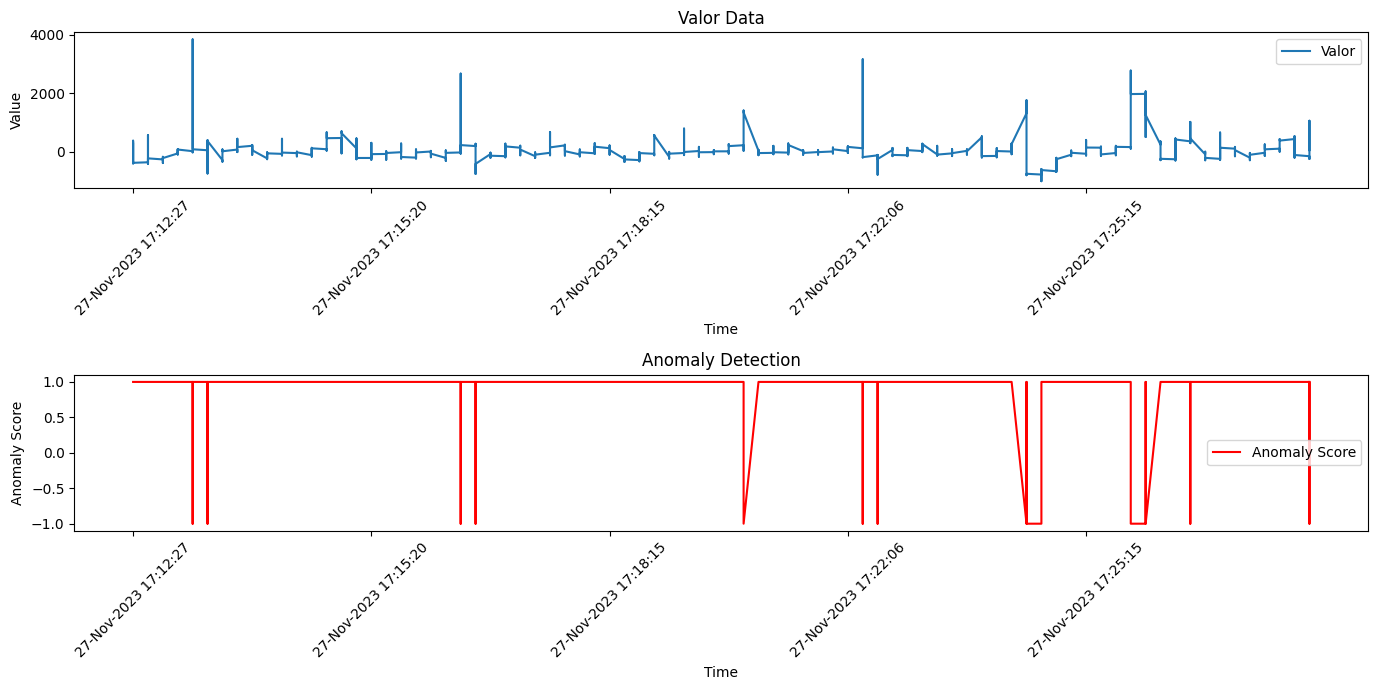

In [32]:
# Seleccionar 5 etiquetas de tiempo equidistantes
num_labels = 5
xticks = data.index[::len(data)//num_labels]

# Paso 4: Visualización de resultados
plt.figure(figsize=(14, 7))

# Gráfica de Valor
plt.subplot(2, 1, 1)
plt.plot(data.index, data['valor'], label='Valor')
plt.title('Valor Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(ticks=xticks, rotation=45)  # Inclinar etiquetas de tiempo y mostrar solo 5 etiquetas

# Gráfica de Puntuación de Anomalía
plt.subplot(2, 1, 2)
plt.plot(data.index, data['anomaly_score'], label='Anomaly Score', color='r')
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()
plt.xticks(ticks=xticks, rotation=45)  # Inclinar etiquetas de tiempo y mostrar solo 5 etiquetas

plt.tight_layout()
plt.show()
